In [55]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
supercoiling_correlation_file = "/Users/annasintsova/Downloads/gb-2004-5-11-r87-s2.xls"
data_set = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/deseq_norm_counts.csv"


In [13]:
sc = (pd.read_excel(supercoiling_correlation_file, header=1)[["NAME", "bnumber", "correl_supercoiling", "p-value"]]
     .set_index(["bnumber"]))
sc.head()

,NAME,correl_supercoiling,p-value
bnumber,,,
b0001,thrL,-0.316352,1.000000
b0002,thrA,-0.744286,0.003125
b0003,thrB,-0.367227,0.999375
b0004,thrC,-0.282582,1.000000
b0005,b0005,0.097336,1.000000


In [48]:
df = pd.read_csv(data_set, index_col=0)


HM01_UR      750.705600
HM03_UR      709.598006
HM06_UR      668.483803
HM07_UR      709.704734
HM14_UR      602.865889
HM17_UR      605.623615
HM43_UR      617.698412
HM54_UR      503.817109
HM56_UR      446.872077
HM57_UR      596.800539
HM60_UR      459.462658
HM66_UR      674.358939
HM68_UR      402.863840
HM86_UR      749.475237
HM01_UTI     824.416160
HM03_UTI     674.750426
HM06_UTI     450.244135
HM07_UTI     681.459335
HM14_UTI     618.722188
HM17_UTI     775.035978
HM43_UTI     579.858843
HM54_UTI     623.629112
HM56_UTI     654.938029
HM57_UTI     617.907864
HM60_UTI     652.107470
HM66_UTI    1009.658479
HM68_UTI     641.866957
HM86_UTI     776.187945
Name: b0103, dtype: float64

In [70]:
neg_sc = sc[(sc.correl_supercoiling < 0) & (sc["p-value"] < 0.05)]
neg_sc.head()

,NAME,correl_supercoiling,p-value
bnumber,,,
b0002,thrA,-0.744286,0.003125
b0021,insB_1,-0.695614,0.000875
b0025,ribF,-0.874500,0.000125
b0026,ileS,-0.874419,0.000125
b0027,lspA,-0.749194,0.002000


In [71]:
df2 = pd.merge(neg_sc, df, how="inner", left_index=True, right_index=True)
df2.head()


,NAME,correl_supercoiling,p-value,HM01_UR,HM03_UR,HM06_UR,HM07_UR,HM14_UR,HM17_UR,HM43_UR,...,HM14_UTI,HM17_UTI,HM43_UTI,HM54_UTI,HM56_UTI,HM57_UTI,HM60_UTI,HM66_UTI,HM68_UTI,HM86_UTI
b0002,thrA,-0.744286,0.003125,1809.173226,1485.090948,1034.399500,1882.376734,1672.556833,1734.666078,1299.616272,...,1777.945422,1036.803096,1944.636593,604.838027,1042.714412,530.767012,791.081193,925.520273,554.492397,1487.268019
b0025,ribF,-0.874500,0.000125,3475.763033,2765.778391,3239.895937,2799.480099,2999.731456,2925.907722,2519.785804,...,3154.919403,3074.480469,2785.480973,4202.156236,3214.985848,3057.851739,2448.075583,2187.593372,3169.008064,2689.848683
b0026,ileS,-0.874419,0.000125,3685.352868,2366.274197,4245.400045,3180.825968,4129.056738,5635.027652,4913.118878,...,5354.272420,5774.274671,6591.356525,5899.226041,6391.374979,4333.276946,3228.466489,3449.666471,4244.387258,6236.312680
b0027,lspA,-0.749194,0.002000,275.817107,428.963107,331.741339,320.330530,425.515852,633.267696,529.644940,...,569.393540,733.974469,686.804044,1065.219594,812.340262,673.361134,598.656038,588.967446,588.097997,681.717701
b0103,yacE,-0.777776,0.000125,750.705600,709.598006,668.483803,709.704734,602.865889,605.623615,617.698412,...,618.722188,775.035978,579.858843,623.629112,654.938029,617.907864,652.107470,1009.658479,641.866957,776.187945


In [72]:
df3 = np.log2(df2.T[3:].astype("float")+1)
df3["treat"] = ["UR"]*14 + ["UTI"]*14
df3.shape

(28, 156)

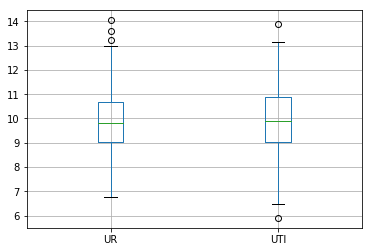

In [73]:
df3.groupby(["treat"]).mean().T.boxplot();

In [75]:
df3.groupby(["treat"]).mean().T

treat,UR,UTI
b0002,10.761160,9.907277
b0025,11.464067,11.538333
b0026,12.098636,12.363431
b0027,8.998102,9.418383
b0103,9.222048,9.397128
b0118,13.239669,11.903041
b0119,8.863785,8.252366
b0126,10.629741,10.668314
b0131,10.814293,10.383601
b0133,9.968143,8.999495
